# Exemplo 0 - Introdução

In [1]:
# Carregando pacote
from gurobipy import *
import matplotlib.pyplot as plt

In [2]:
# criando a instancia do modelo
modelo = Model()

# Criando as variaveis
v0 = modelo.addVar()
v1 = modelo.addVar()
modelo.update() # Verificar para o que serve

Set parameter Username


GurobiError: License expired 2022-06-20

In [3]:
# Adicinando as Restrições
modelo.addConstr(v0 - v1 <= 4) # restrição 1
modelo.addConstr(v0 + v1 <= 4) # Restrição 2
modelo.addConstr(-0.25* v0 + v1 <= 1) # Restrição 3

<gurobi.Constr *Awaiting Model Update*>

In [4]:
# Criando o objetivo do modelo
modelo.setObjective(v1, GRB.MAXIMIZE) # Maximazar a variavel 1
modelo.params.outputflag = 0
modelo.optimize() # Otimizando o modelo

### Formato 1 de ver a Resposta

In [5]:
print('Variavel 0 ->', v0.x)
print('Variavel 1 -> ', v1.x)

Variavel 0 -> 2.4
Variavel 1 ->  1.6


### Formato 2 de ver a Resposta

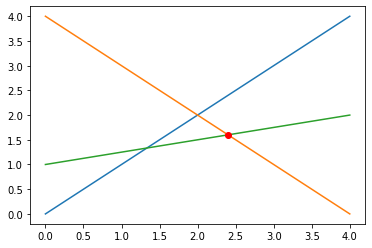

In [6]:
plt.plot([0,4], [0,4]) # Restrição 1
plt.plot([4,0], [0,4]) # Restrição 2
plt.plot([0,4], [1,2]) # Restrição 3

plt.plot([v0.x], [v1.x], 'ro') # Adicionado o ponto com melhor reposta
plt.show()

# Exemplo 1 - Exercicio de PO

Exercicio da Questão 4 da primeira lista de exercicios do semestre

In [12]:
# Criando o modelo
# criando a instancia do modelo
modelo = Model()

# Criando as variaveis
R = modelo.addVar()
B = modelo.addVar()

modelo.update() # Verificar para o que serve

In [13]:
# Criando as restrições

modelo.addConstr(8*R + 6*B >= 48)
modelo.addConstr(R + 2*B >=12)
modelo.addConstr(R + 2*B <= 20)

<gurobi.Constr *Awaiting Model Update*>

In [14]:
# Criando o objetivo do modelo
modelo.setObjective((0.06*R + 0.08 * B) , GRB.MAXIMIZE) # Maximazar a variavel 1
modelo.params.outputflag = 0
modelo.optimize() # Otimizando o modelo

In [15]:
print('Variavel R ->', R.x)
print('Variavel B -> ', B.x)

Variavel R -> 20.0
Variavel B ->  0.0


# Exemplo 2 - Modelo de Rede

Exercicio 7

In [16]:
# Declarando as variaveis
fabricas = ['Sao Paulo', 'Joao Pessoa', 'Manaus']
revenda = ['Rio de Janeiro', 'Salvador', 'Aracaju', 'Maceio', 'Recife']

In [17]:
# Declarando os custos de Frete
combinacoes, preco = multidict({
    ('Sao Paulo', 'Rio de Janeiro'): 1.0,
    ('Sao Paulo', 'Salvador'): 2.0,
    ('Sao Paulo', 'Aracaju'): 3.0,
    ('Sao Paulo', 'Maceio'): 3.5,
    ('Sao Paulo', 'Recife'): 4.0,
    
    ('Joao Pessoa', 'Rio de Janeiro'): 4.0,
    ('Joao Pessoa', 'Salvador'): 2.0,
    ('Joao Pessoa', 'Aracaju'): 1.5,
    ('Joao Pessoa', 'Maceio'): 1.2,
    ('Joao Pessoa', 'Recife'): 1.0,
    
    ('Manaus', 'Rio de Janeiro'): 6.0,
    ('Manaus', 'Salvador'): 4.0,
    ('Manaus', 'Aracaju'): 3.5,
    ('Manaus', 'Maceio'): 3.0,
    ('Manaus', 'Recife'): 2.0,
})

In [18]:
# Iniciando o modelo
m = Model('RAP')

In [19]:
# Criando as variaveis do modelo
x = m.addVars(combinacoes, name="assign")

In [20]:
# Criando restrição da capacidade maxima (Por linha)
capacidade = [10000, 5000, 6000]
capacidade = m.addConstrs( (x.sum(fabrica,'*') <= capacidade[fabricas.index(fabrica)] for fabrica in fabricas), name='Capacidade_Maxima')

In [21]:
# Criando restrição da capacidade minima (Por coluna)
demanda = [6000, 5000, 2000, 1000, 3000]
demanda = m.addConstrs( (x.sum('*',ponto) == demanda[revenda.index(ponto)] for ponto in revenda), name='demanda')

In [22]:
# Criando a função objetivo ( Minimazar o custo)
m.setObjective(x.prod(preco), GRB.MINIMIZE)

In [23]:
# Salvar o modelo
m.write('RAP.lp')

In [24]:
# Iniciando a otimização
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 8 rows, 15 columns and 30 nonzeros
Model fingerprint: 0xba10cd6e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+04]
Presolve time: 0.01s
Presolved: 8 rows, 15 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.3200000e+04   2.000000e+03   0.000000e+00      0s
       2    2.5200000e+04   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.520000000e+04


In [25]:
# Imprimento as respostas
for v in m.getVars():
    if v.x > 0:
        print(v.varName, v.x)

# Imprimindo Resultado
print('')
print('Custo Minimo Localizado: ', m.objVal)

assign[Sao Paulo,Rio de Janeiro] 6000.0
assign[Sao Paulo,Salvador] 4000.0
assign[Joao Pessoa,Salvador] 1000.0
assign[Joao Pessoa,Aracaju] 2000.0
assign[Joao Pessoa,Maceio] 1000.0
assign[Joao Pessoa,Recife] 1000.0
assign[Manaus,Recife] 2000.0

Custo Minimo Localizado:  25200.0
